In [28]:
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
x = [1,2,3]
y = [4,5,6]

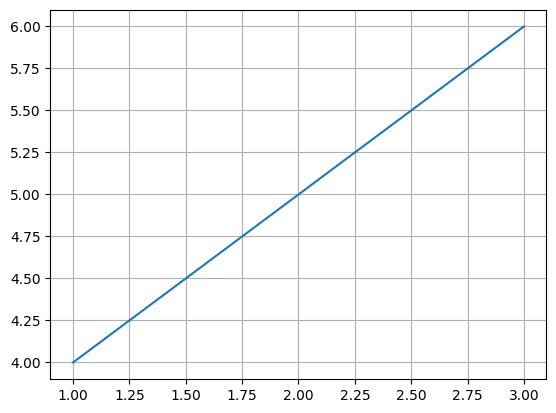

In [30]:
plt.plot(x, y)
plt.grid()
plt.show()

#Pyplot API

#Univariate - Numerical

In [31]:
data = {
    "Salary" : [25000, 30000, 37000, 28000, 39000, 48000, 55000, 52000, 35000, 30000, 27000, 31000]
}

In [32]:
df = pd.DataFrame(data)
df.head()

,Salary
0,25000
1,30000
2,37000
3,28000
4,39000


In [33]:
df.shape

(12, 1)

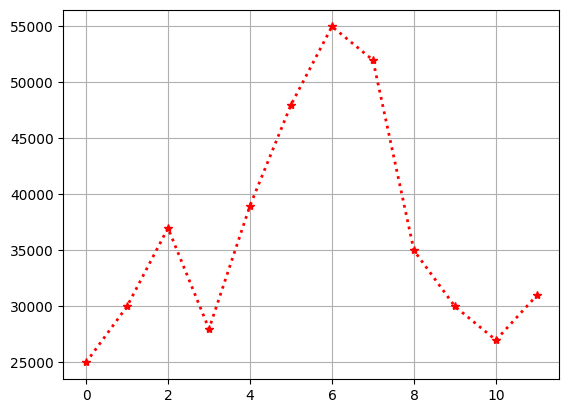

In [34]:
# Line plot
plt.plot(df['Salary'], color = 'red', marker = '*', linestyle = ':', linewidth = 2)
plt.grid()
plt.show()

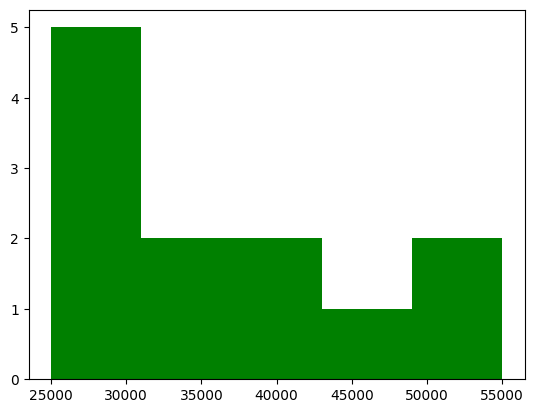

In [35]:
# Histogram
plt.hist(df["Salary"], bins = 5, color = 'green')
plt.show()

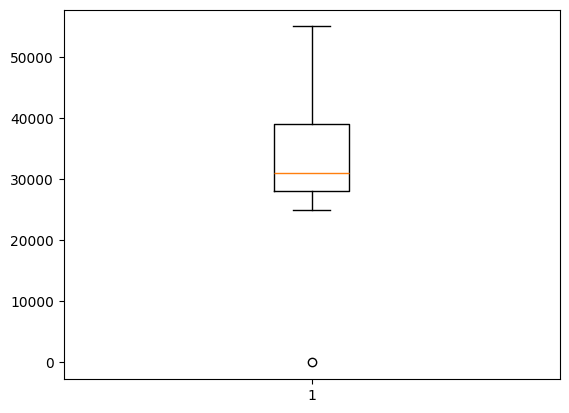

In [36]:
#Boxplot
df.loc[12] = [0]
plt.boxplot(df['Salary'])
plt.show()

In [37]:

df.drop(index = 12, inplace = True)
df.shape

(12, 1)

In [38]:
# Univariate: Categorical
df['dept'] = ["HR", "IT", 'Finance', 'HR', 'Finance', 'Marketing', 'IT', 'HR', 'Finance', 'Marketing', 'IT', 'HR']
df.head()

,Salary,dept
0,25000,HR
1,30000,IT
2,37000,Finance
3,28000,HR
4,39000,Finance


In [39]:
# Pie chart
count = df['dept'].value_counts()
count

dept
HR           4
IT           3
Finance      3
Marketing    2
Name: count, dtype: int64

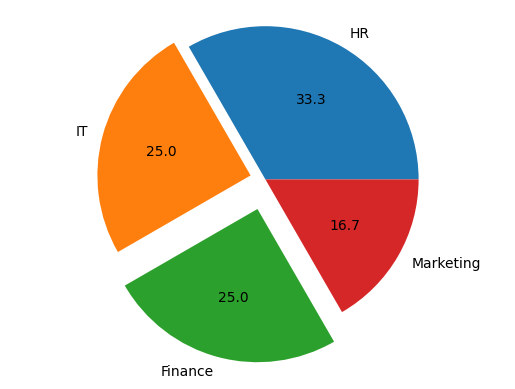

In [40]:
plt.pie(count, labels = count.index, autopct = '%1.1f', explode = [0, 0.1, 0.2, 0])
plt.axis("equal")
plt.show()

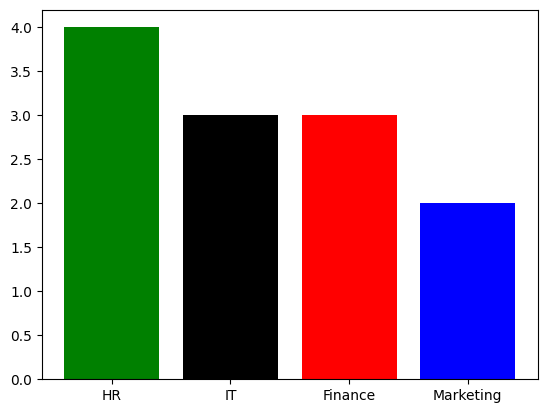

In [41]:
# Count plot
plt.bar(count.index, count, color = ['green', 'black', 'red', 'blue'])
plt.show()

In [42]:
# Bivariate: numerical, numerical
df['age'] = [25,22,45,67,89,19,20,30,34,23,34,45]
df.head()

,Salary,dept,age
0,25000,HR,25
1,30000,IT,22
2,37000,Finance,45
3,28000,HR,67
4,39000,Finance,89


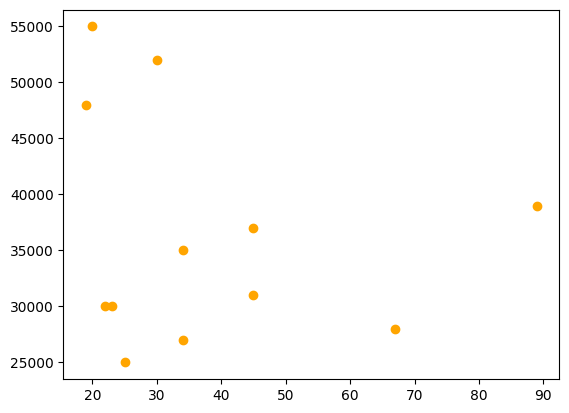

In [43]:
# Scatter plot
plt.scatter(df['age'], df['Salary'], color = 'orange')
plt.show()

In [44]:
sort_age = df.sort_values('age')

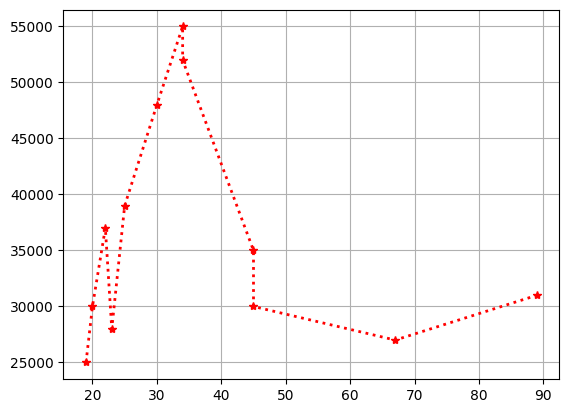

In [45]:
# Line plot:
plt.plot(sort_age['age'], df['Salary'], color = 'red', marker = '*', linestyle = ':', linewidth = 2)
plt.grid()
plt.show()

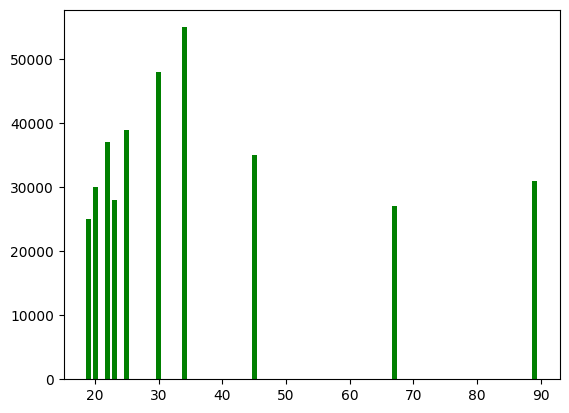

In [46]:
# Bar plot
plt.bar(sort_age['age'], df['Salary'], color = 'green', align = 'center')
plt.show()

In [47]:
# Bivariate: Numerical, categorical
hr_sal = df[df['dept'] == 'HR']['Salary']
hr_sal
it_sal = df[df['dept'] == 'IT']['Salary']
it_sal
fin_sal = df[df['dept'] == 'Finance']['Salary']
mar_sal = df[df['dept'] == 'Marketing']['Salary']
mar_sal

5    48000
9    30000
Name: Salary, dtype: int64

C:\Users\mak40\AppData\Local\Temp\ipykernel_25424\3823379053.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hr_sal, it_sal, fin_sal, mar_sal], labels = ['HR', 'IT', 'Finance', 'Marketing'])


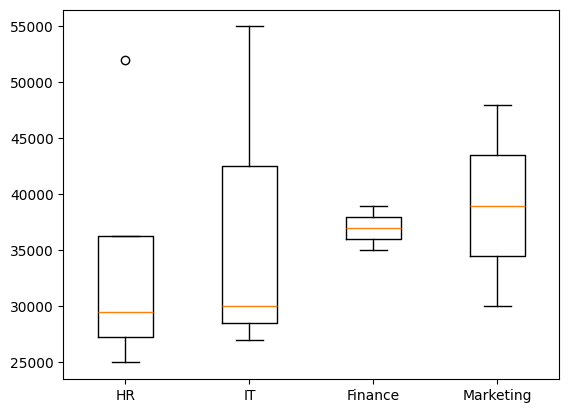

In [48]:
# Boxplot
plt.boxplot([hr_sal, it_sal, fin_sal, mar_sal], labels = ['HR', 'IT', 'Finance', 'Marketing'])
plt.show()

In [49]:
# Pie chart
sal_by_dept = df.groupby('dept')['Salary'].sum()
sal_by_dept

dept
Finance      111000
HR           136000
IT           112000
Marketing     78000
Name: Salary, dtype: int64

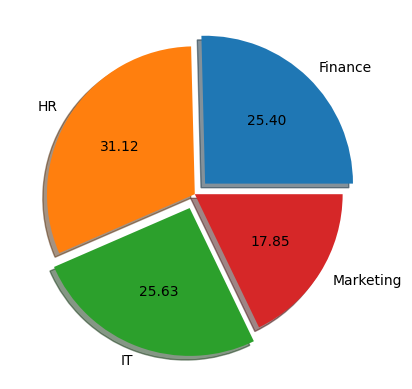

In [55]:
plt.pie(sal_by_dept, labels = sal_by_dept.index, autopct = "%1.2f", shadow = True, explode = [0.1, 0, 0.1, 0])
plt.show()

In [51]:
# Bar plot
hr_mean = sum(hr_sal)/len(hr_sal)
it_mean = sum(it_sal)/len(it_sal)
fin_mean = sum(fin_sal)/len(fin_sal)
mar_mean = sum(mar_sal)/len(mar_sal)

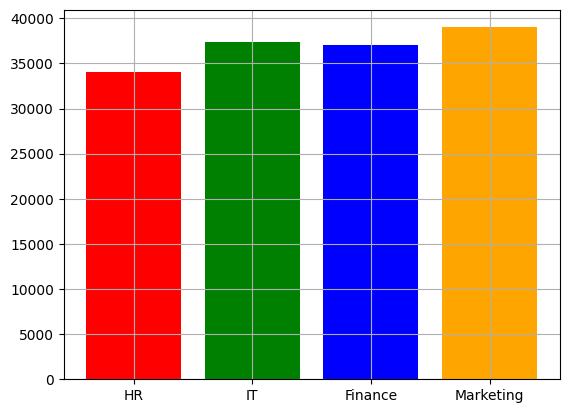

In [53]:
plt.bar(['HR', 'IT', 'Finance', 'Marketing'], [hr_mean, it_mean, fin_mean, mar_mean], color =['red','green', 'blue', 'orange'])
plt.grid()
plt.show()

# Multivariate Analysis

In [57]:
# 3 numerical columns
df['exp'] = [1,2,3,4,5,6,7,8,9,10,11,12]
df.head()

,Salary,dept,age,exp
0,25000,HR,25,1
1,30000,IT,22,2
2,37000,Finance,45,3
3,28000,HR,67,4
4,39000,Finance,89,5


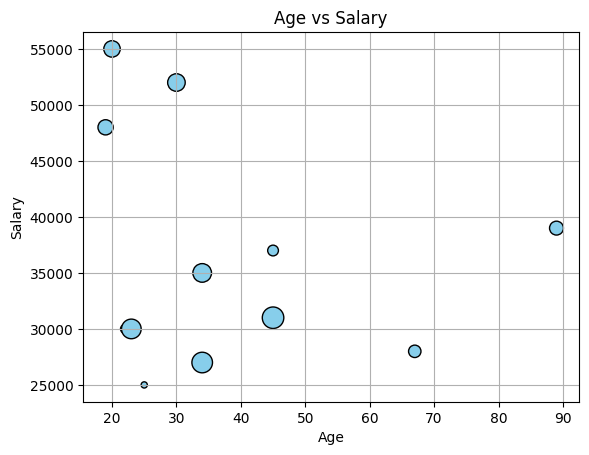

In [ ]:
# Bubble plot
plt.scatter(df['age'], df['Salary'], s = df['exp']*20, color = 'skyblue', edgecolor = 'black')
plt.title('Age vs Salary vs Experience')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.show()

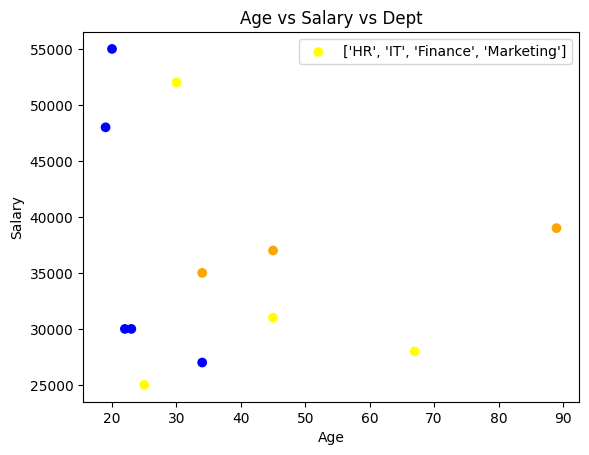

In [64]:
# 2 numerical and 1 categorical column
plt.scatter(df['age'], df['Salary'], c = df['dept'].map({'HR': 'yellow', 'IT':'blue', 'Finance':'orange', 'Marketing':'blue'}), label = ['HR', 'IT', 'Finance', 'Marketing'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary vs Dept')
plt.legend()
plt.show()

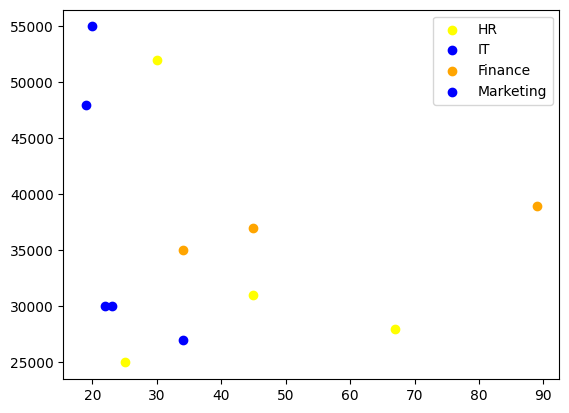

In [66]:
color = {'HR': 'yellow', 'IT':'blue', 'Finance':'orange', 'Marketing':'blue'}

for dept, color in color.items():
    df_dept = df[df['dept'] == dept]
    plt.scatter(df_dept['age'], df_dept['Salary'], c = color, label = dept) 
plt.legend()

# Object oriented API

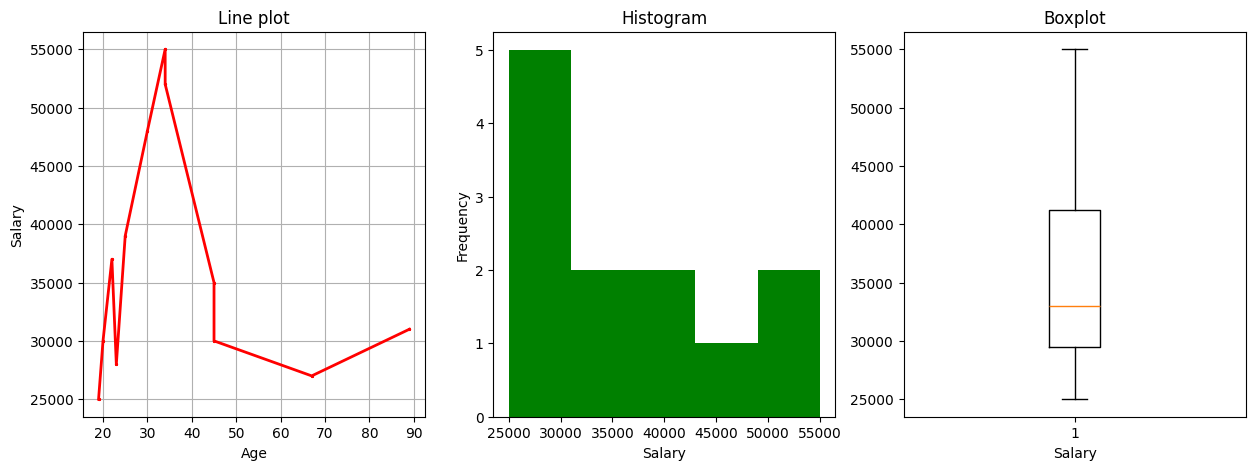

In [70]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))

# Line plot
axs[0].plot(sort_age['age'], df['Salary'], color = 'red', marker = '*', linewidth = 2, markersize = 2)
axs[0].grid()
axs[0].set_title('Line plot')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Salary')

# Histogram
axs[1].hist(df['Salary'], bins = 5, color = 'green')
axs[1].set_title('Histogram')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('Frequency')

# Boxplot
axs[2].boxplot(df['Salary'])
axs[2].set_title("Boxplot")
axs[2].set_xlabel('Salary')

plt.savefig('multipleplots.png')
plt.show()

In [71]:
data2 = {
    'Year': [2021, 2022, 2023, 2024],
    'Sales': [100,150, 200,250],
    'Profit': [20, 30, 40, 50],
    'Expenses': [80, 120, 160, 200]
}

df2 = pd.DataFrame(data2)

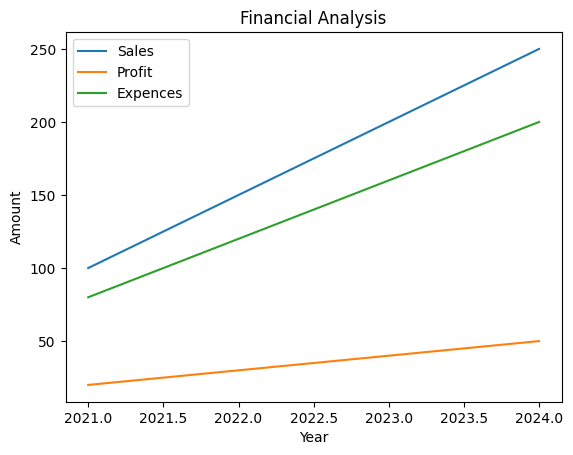

In [74]:
plt.plot(df2['Year'], df2['Sales'], label = 'Sales')
plt.plot(df2['Year'], df2['Profit'], label = 'Profit')
plt.plot(df2['Year'], df2['Expenses'], label = 'Expences')

plt.title('Financial Analysis')
plt.xlabel("Year")
plt.ylabel('Amount')
plt.legend()
plt.show()

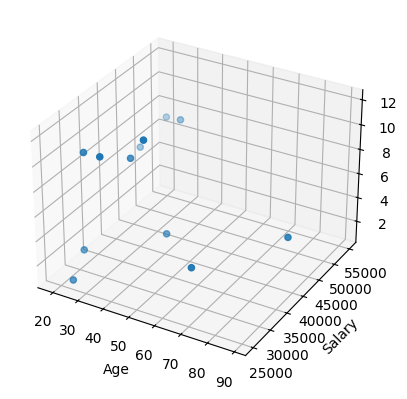

In [ ]:
# 3D plots
ax = plt.axes(projection = '3d')

ax.scatter(df['age'], df['Salary'], df['exp'])
ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_zlabel('Experience')
plt.show()